In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pylab as plt
import matplotlib.dates as dates
from matplotlib.pylab import rcParams
import plotly.plotly as py

dataMaster = pd.read_csv('NSE-HDFC.csv')
print(dataMaster.head())
#print(dataMaster['Close Price'].count())

D:\InstalledApps\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


  Symbol Series       Date  Prev Close  Open Price  High Price  Low Price  \
0   HDFC     EQ  17-Nov-15     1178.40     1190.20     1203.95     1184.0   
1   HDFC     EQ  18-Nov-15     1200.75     1199.00     1202.50     1176.0   
2   HDFC     EQ  19-Nov-15     1178.70     1187.25     1217.00     1184.5   
3   HDFC     EQ  20-Nov-15     1214.20     1216.00     1222.20     1200.0   
4   HDFC     EQ  23-Nov-15     1205.75     1210.00     1211.00     1184.1   

   Last Price  Close Price  Average Price  Total Traded Quantity  \
0      1200.0      1200.75        1193.87                1926695   
1      1177.1      1178.70        1190.58                1823920   
2      1213.1      1214.20        1202.49                2607107   
3      1205.0      1205.75        1210.12                2659599   
4      1192.2      1191.15        1193.90                2241804   

       Turnover  No. of Trades  Deliverable Qty  % Dly Qt to Traded Qty  
0  2.300214e+09          65822          1329733       

In [2]:
hdfc_close = dataMaster['Close Price']
print(hdfc_close.head())

0    1200.75
1    1178.70
2    1214.20
3    1205.75
4    1191.15
Name: Close Price, dtype: float64


In [48]:
ran = pd.date_range('2015-11-17', '2017-10-9', freq = 'B')
ts = pd.Series(dataMaster['Close Price'].values, index =ran)

print (ts.head(5))
print (ts.index)

2015-11-17    1200.75
2015-11-18    1178.70
2015-11-19    1214.20
2015-11-20    1205.75
2015-11-23    1191.15
Freq: B, dtype: float64
DatetimeIndex(['2015-11-17', '2015-11-18', '2015-11-19', '2015-11-20',
               '2015-11-23', '2015-11-24', '2015-11-25', '2015-11-26',
               '2015-11-27', '2015-11-30',
               ...
               '2017-09-26', '2017-09-27', '2017-09-28', '2017-09-29',
               '2017-10-02', '2017-10-03', '2017-10-04', '2017-10-05',
               '2017-10-06', '2017-10-09'],
              dtype='datetime64[ns]', length=495, freq='B')


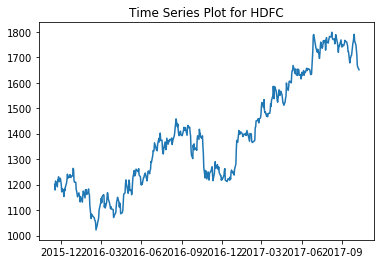

In [49]:
# Plot the data
plt.plot(ts.index.to_pydatetime(), ts.values)
plt.title('Time Series Plot for HDFC')
plt.show()

In [54]:
print (ts.head(5))
print (ts.dtypes)
#print (ran)

2015-11-17    1200.75
2015-11-18    1178.70
2015-11-19    1214.20
2015-11-20    1205.75
2015-11-23    1191.15
Freq: B, dtype: float64
float64


In [55]:
HDFC_TR = ts['2015':'2017']
print (HDFC_TR.head())

2015-11-17    1200.75
2015-11-18    1178.70
2015-11-19    1214.20
2015-11-20    1205.75
2015-11-23    1191.15
Freq: B, dtype: float64


D:\InstalledApps\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



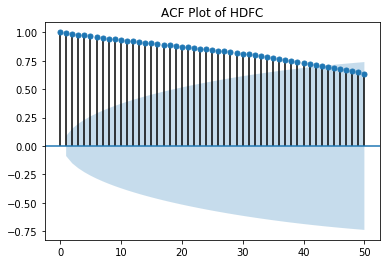

In [57]:
# Auto Correlation Function plot for Original data
acf = plot_acf(ts, lags = 50)
plt.title("ACF Plot of HDFC")
acf.show()

D:\InstalledApps\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



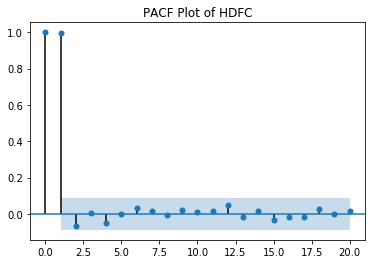

In [59]:
pacf = plot_pacf(ts, lags = 20)
plt.title("PACF Plot of HDFC")
pacf.show()

In [62]:
# TRANSFORMING OUR DATA TO ADJUST FOR NON-STATIONARITY

hdfc_diff = ts - ts.shift()
diff = hdfc_diff.dropna()
print (diff.head(5))
print (diff.dtypes)

2015-11-18   -22.05
2015-11-19    35.50
2015-11-20    -8.45
2015-11-23   -14.60
2015-11-24    27.80
Freq: B, dtype: float64
float64


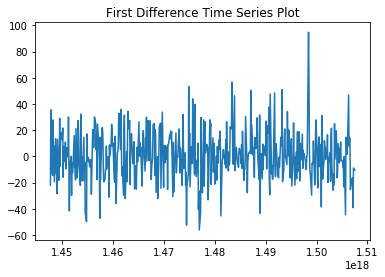

In [63]:
plt.figure()
plt.plot(diff)
plt.title('First Difference Time Series Plot')
plt.show()

D:\InstalledApps\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



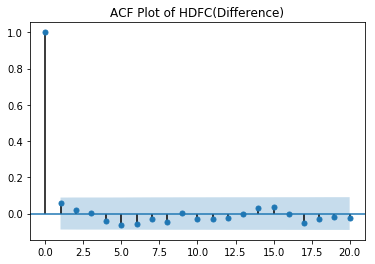

In [66]:
acfDiff = plot_acf(diff, lags = 20)
plt.title("ACF Plot of HDFC(Difference)")
acfDiff.savefig("hdfc_images/timeSeriesACFDiff.png", format = 'png')
acfDiff.show()

D:\InstalledApps\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



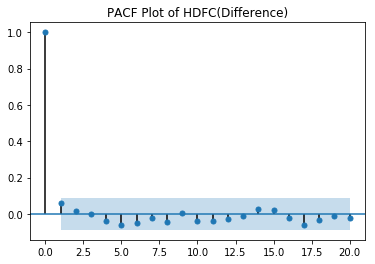

In [67]:
# edit this shit on the actual project !
pacfDiff = plot_pacf(diff, lags = 20)
plt.title("PACF Plot of HDFC(Difference)")
pacfDiff.savefig("hdfc_images/pacfDiff.png", format = 'png')
pacfDiff.show()

In [88]:
# Build Model ARIMA

mod = ARIMA(HDFC_TR, order = (2, 2, 2), freq = 'M')

results = mod.fit()
print (results.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  493
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -2152.399
Method:                       css-mle   S.D. of innovations             18.932
Date:                Thu, 16 Nov 2017   AIC                           4316.799
Time:                        17:50:12   BIC                           4342.002
Sample:                    11-19-2015   HQIC                          4326.694
                         - 10-09-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.006      0.277      0.782      -0.011       0.014
ar.L1.D2.y     0.0715      1.169      0.061      0.951      -2.220       2.363
ar.L2.D2.y     0.0157      0.086      0.183      0.8

In [94]:
# Forecast
predVals = results.predict(start=2, end=2)
print (predVals.head(5))

Series([], Freq: M, dtype: float64)


In [ ]:
predVals = predVals.drop(predVals.index[0])
print (predVals)

hdfc_for = pd.concat([ts, predVals], axis = 1, keys=['original', 'predicted'])
print (hdfc_for['2016':'2017'])

plt.figure()
plt.plot(hdfc_for)
plt.title("Actual Vs. Forecasted Values")
plt.savefig("hdfc_images/hdfc_for.png", format = 'png')
plt.show()

plt.figure()
plt.plot(hdfc_for)
plt.title('Real Vs. Predicted Values for 2017')
plt.savefig("images/hdfc_for2.png", format = 'png')
plt.show()